In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# chemin depuis le dossier notebooks/ vers ton CSV
DATA_PATH = "../data/processed/f1_finalcomplete_global_sc_weather_standings_pitstop.csv"

# skipinitialspace enlève les espaces après les virgules dans le CSV
df = pd.read_csv(DATA_PATH, skipinitialspace=True)

# on nettoie les noms de colonnes (enlève espaces au début/fin)
df.columns = df.columns.str.strip()

df.head()


,year,date,round,raceId,race_name,driverId,forename,surname,code,constructorId,...,humidity_mean,pressure_mean,windspeed_mean,rainfall_any,driver_standings_position_pre_race,driver_standings_points_pre_race,constructor_standings_position_pre_race,constructor_standings_points_pre_race,pitstop_count,pitstop_total_ms
0,2021,2021-03-28,1,1052,Bahrain Grand Prix,1,Lewis,Hamilton,HAM,131,...,54.517293,1014.910526,0.887218,False,NaN,NaN,NaN,NaN,2.0,48915.0
1,2021,2021-03-28,1,1052,Bahrain Grand Prix,830,Max,Verstappen,VER,9,...,54.517293,1014.910526,0.887218,False,NaN,NaN,NaN,NaN,2.0,48615.0
2,2021,2021-03-28,1,1052,Bahrain Grand Prix,822,Valtteri,Bottas,BOT,131,...,54.517293,1014.910526,0.887218,False,NaN,NaN,NaN,NaN,3.0,81725.0
3,2021,2021-03-28,1,1052,Bahrain Grand Prix,846,Lando,Norris,NOR,1,...,54.517293,1014.910526,0.887218,False,NaN,NaN,NaN,NaN,2.0,50539.0
4,2021,2021-03-28,1,1052,Bahrain Grand Prix,815,Sergio,Pérez,PER,9,...,54.517293,1014.910526,0.887218,False,NaN,NaN,NaN,NaN,3.0,72289.0


In [153]:
df.columns

Index(['year', 'date', 'round', 'raceId', 'race_name', 'driverId', 'forename',
       'surname', 'code', 'constructorId', 'team_name', 'grid',
       'finish_position', 'finish_text', 'statusId', 'points',
       'safetycar_events', 'total_safetycar_laps', 'airtemp_mean',
       'tracktemp_mean', 'humidity_mean', 'pressure_mean', 'windspeed_mean',
       'rainfall_any', 'driver_standings_position_pre_race',
       'driver_standings_points_pre_race',
       'constructor_standings_position_pre_race',
       'constructor_standings_points_pre_race', 'pitstop_count',
       'pitstop_total_ms'],
      dtype='object')

In [154]:
sorted(df["finish_text"].astype(str).unique())

['1           ',
 '10          ',
 '11          ',
 '12          ',
 '13          ',
 '14          ',
 '15          ',
 '16          ',
 '17          ',
 '18          ',
 '19          ',
 '2           ',
 '20          ',
 '3           ',
 '4           ',
 '5           ',
 '6           ',
 '7           ',
 '8           ',
 '9           ',
 'D           ',
 'R           ',
 'W           ']

In [155]:
df["finish_text"].unique()

array(['1           ', '2           ', '3           ', '4           ',
       '5           ', '6           ', '7           ', '8           ',
       '9           ', '10          ', '11          ', '12          ',
       '13          ', '14          ', '15          ', '16          ',
       '17          ', '18          ', 'R           ', '19          ',
       'W           ', '20          ', 'D           '], dtype=object)

In [156]:
# 1) Nettoyer finish_text : enlever les espaces au début/fin
df["finish_text_clean"] = df["finish_text"].astype(str).str.strip()

# Vérifier les valeurs uniques après nettoyage
sorted(df["finish_text_clean"].unique())

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'D',
 'R',
 'W']

In [157]:
mask_classified = df["finish_text_clean"].str.fullmatch(r"\d+")

df_classified = df[mask_classified].copy()

len(df_classified), df_classified.head()

(1150,
    year         date  round  raceId                   race_name  driverId  \
 0  2021  2021-03-28       1    1052  Bahrain Grand Prix                 1   
 1  2021  2021-03-28       1    1052  Bahrain Grand Prix               830   
 2  2021  2021-03-28       1    1052  Bahrain Grand Prix               822   
 3  2021  2021-03-28       1    1052  Bahrain Grand Prix               846   
 4  2021  2021-03-28       1    1052  Bahrain Grand Prix               815   
 
      forename      surname   code  constructorId  ... pressure_mean  \
 0  Lewis       Hamilton     HAM              131  ...   1014.910526   
 1  Max         Verstappen   VER                9  ...   1014.910526   
 2  Valtteri    Bottas       BOT              131  ...   1014.910526   
 3  Lando       Norris       NOR                1  ...   1014.910526   
 4  Sergio      Pérez        PER                9  ...   1014.910526   
 
    windspeed_mean   rainfall_any driver_standings_position_pre_race  \
 0        0.88721

In [158]:
df_classified["delta"] = df_classified["finish_position"] - df_classified["grid"]

df_classified[["year", "race_name", "driverId", "grid", "finish_position", "delta"]].head(15)

,year,race_name,driverId,grid,finish_position,delta
0,2021,Bahrain Grand Prix,1,2,1,-1
1,2021,Bahrain Grand Prix,830,1,2,1
2,2021,Bahrain Grand Prix,822,3,3,0
3,2021,Bahrain Grand Prix,846,7,4,-3
4,2021,Bahrain Grand Prix,815,0,5,5
5,2021,Bahrain Grand Prix,844,4,6,2
6,2021,Bahrain Grand Prix,817,6,7,1
7,2021,Bahrain Grand Prix,832,8,8,0
8,2021,Bahrain Grand Prix,852,13,9,-4
9,2021,Bahrain Grand Prix,840,10,10,0


In [159]:
df_classified["delta"].describe()

count    1150.000000
mean       -0.539130
std         4.759466
min       -18.000000
25%        -3.000000
50%        -1.000000
75%         1.000000
max        19.000000
Name: delta, dtype: float64

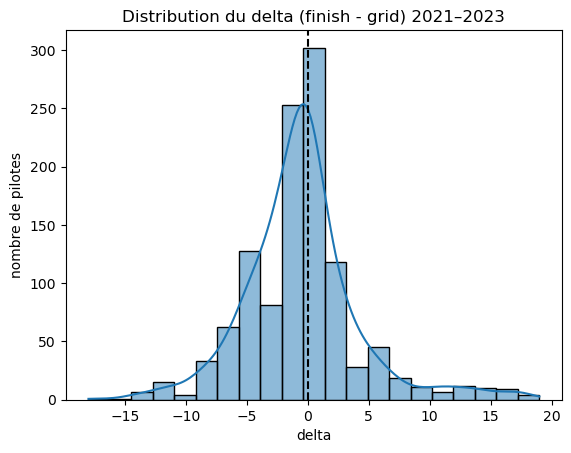

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_classified["delta"], bins=21, kde=True)
plt.axvline(0, linestyle="--", color="black")
plt.title("Distribution du delta (finish - grid) 2021–2023")
plt.xlabel("delta")
plt.ylabel("nombre de pilotes")
plt.show()

In [161]:
thresholds = [3, 4, 5, 6, 7]

results = []

for t in thresholds:
    over = (df_classified["delta"] <= -t).sum()
    under = (df_classified["delta"] >= t).sum()
    total = len(df_classified)
    
    results.append({
        "threshold": t,
        "over_count": over,
        "under_count": under,
        "over_pct": over/total * 100,
        "under_pct": under/total * 100,
    })

pd.DataFrame(results)

,threshold,over_count,under_count,over_pct,under_pct
0,3,332,198,28.869565,17.217391
1,4,251,145,21.826087,12.608696
2,5,183,117,15.913043,10.173913
3,6,123,89,10.695652,7.739130
4,7,87,72,7.565217,6.260870


In [162]:
q25 = df_classified["delta"].quantile(0.25)
q75 = df_classified["delta"].quantile(0.75)

q25, q75

(np.float64(-3.0), np.float64(1.0))

In [163]:
over_q25 = (df_classified["delta"] <= q25).sum()
under_q75 = (df_classified["delta"] >= q75).sum()
total = len(df_classified)

print("Overperformers (%) =", over_q25/total*100)
print("Underperformers (%) =", under_q75/total*100)

Overperformers (%) = 28.8695652173913
Underperformers (%) = 31.82608695652174


In [164]:
std = df_classified["delta"].std()

over_std = (df_classified["delta"] <= -std).sum()
under_std = (df_classified["delta"] >= std).sum()
total = len(df_classified)

print("threshold =", round(std,2))
print("Over (%) =", over_std/total*100)
print("Under (%) =", under_std/total*100)

threshold = 4.76
Over (%) = 15.91304347826087
Under (%) = 10.173913043478262


In [165]:
def classify_performance(delta):
    if delta <= -3:
        return "over"
    elif delta >= 3:
        return "under"
    else:
        return "neutral"

df_classified["performance"] = df_classified["delta"].apply(classify_performance)

In [166]:
df_classified["performance"].value_counts()

performance
neutral    620
over       332
under      198
Name: count, dtype: int64

In [167]:
df_classified[df_classified["performance"]=="over"].head()
df_classified[df_classified["performance"]=="under"].head()

,year,date,round,raceId,race_name,driverId,forename,surname,code,constructorId,...,rainfall_any,driver_standings_position_pre_race,driver_standings_points_pre_race,constructor_standings_position_pre_race,constructor_standings_points_pre_race,pitstop_count,pitstop_total_ms,finish_text_clean,delta,performance
4,2021,2021-03-28,1,1052,Bahrain Grand Prix,815,Sergio,Pérez,PER,9,...,False,NaN,NaN,NaN,NaN,3.0,72289.0,5,5,under
16,2021,2021-03-28,1,1052,Bahrain Grand Prix,842,Pierre,Gasly,GAS,213,...,False,NaN,NaN,NaN,NaN,3.0,87638.0,17,12,under
30,2021,2021-04-18,2,1053,Emilia Romagna Grand Prix,815,Sergio,Pérez,PER,9,...,True,5.0,10.0,2.0,28.0,2.0,1625766.0,11,9,under
34,2021,2021-04-18,2,1053,Emilia Romagna Grand Prix,20,Sebastian,Vettel,VET,117,...,True,15.0,0.0,6.0,1.0,5.0,1607076.0,15,15,under
50,2021,2021-05-02,3,1054,Portuguese Grand Prix,832,Carlos,Sainz,SAI,6,...,False,6.0,14.0,4.0,34.0,3.0,70165.0,11,6,under


In [168]:
total = len(df_classified)
df_classified["performance"].value_counts(normalize=True) * 100

performance
neutral    53.913043
over       28.869565
under      17.217391
Name: proportion, dtype: float64